In [1]:
%%bash
pip install git+https://github.com/Tokukawa/PortfolioAnalyzer.git

In [1]:
%matplotlib inline
from portfolio_analyzer.stocks_data_loader import yahoo2pandas
from portfolio_analyzer.optimizers import approximated_max_kelly, minimal_variance, risk_parity
from portfolio_analyzer.balancer import Rebalance
from portfolio_analyzer.backtest import NaiveBackTest

In [2]:
tickers = ['VTI', 'TLT', 'GLD']
data = yahoo2pandas(tickers)

In [3]:
data.head()

,GLD,TLT,VTI
formatted_date,,,
2004-11-15,44.779999,88.260002,56.974998
2004-11-22,45.290001,88.250000,57.700001
2004-11-29,45.599998,87.440002,58.174999
2004-12-06,43.439999,88.849998,58.000000
2004-12-13,44.189999,88.750000,58.599998


In [4]:
minimal_variance(data)

,GLD,TLT,VTI
0,0.15198,0.497285,0.350736


In [5]:
risk_parity(data)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.1016262566e-15
            Iterations: 21
            Function evaluations: 105
            Gradient evaluations: 21


,GLD,TLT,VTI
0,0.243998,0.420017,0.335985


In [6]:
approximated_max_kelly(data)

,GLD,TLT,VTI
0,0.253125,0.371098,0.375777


In [7]:
portfolio_exposure = {
    'VTI': 11, 
    'TLT': 22, 
    'GLD': 33
}

optimal_weights = {
    'VTI': 0.37891, 
    'TLT': 0.368061, 
    'GLD': 0.253029
}

In [8]:
rebalancer = Rebalance(portfolio_exposure, optimal_weights, 123.)

In [9]:
new_exposure, balance = rebalancer.compute()

In [10]:
new_exposure, balance

({'GLD': 17, 'TLT': 26, 'VTI': 23}, 10024.430053710938)

In [11]:
rebalancer.diff(new_exposure)

{'GLD': -16.0, 'TLT': 4.0, 'VTI': 12.0}

In [12]:
backtest = NaiveBackTest(optimal_weights, data)

In [18]:
portfolio = backtest.run()

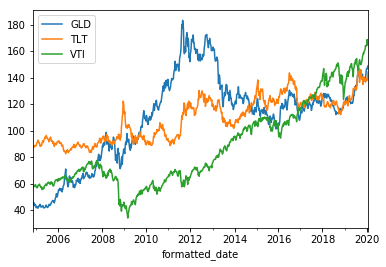

In [14]:
data.plot()

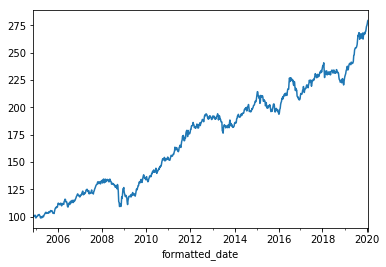

In [19]:
portfolio.plot()

In [20]:
backtest = NaiveBackTest(minimal_variance(data).loc[0].to_dict(), data)

In [21]:
portfolio = backtest.run()

In [ ]:
p